In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df=pd.read_csv('movie_data.csv')

In [4]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


In [5]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49969 entries, 0 to 49968
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49969 non-null  object
 1   sentiment  49969 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 780.9+ KB


In [7]:
for i in range(5):
    print(df['review'][i],'-',df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

In [8]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    words = [x.lower() for x in text]
    word = ' '.join(words)
    return word

In [9]:
df['review']=df['review'].apply(preprocess)

In [10]:
for i in range(5):
    print(df['review'][i],'-',df['sentiment'][i])
    print()

this movie is just crap even though the directors claim to be part of that oi culture it s still a very very bad directorial debut the topic itself is very interesting and i accept the bad acting due to the fact that they are all amateurs and never acted before but the worst thing about this film are the dialogs and very unexperienced and naive directing there s no timing at all in that movie i felt like the directors were so exited to do that movie it s their first feature that they actually never really asked themselves what story they wanna tell i met ben one of the directors on several occasions and he s a nice and thoughtful guy but that doesn t make him a director i think that american history x is full of clich s but somehow manages to transport a story oi warning is full of clich s doesn t tell anything new or provocative and that s the sad thing about this movie it s far from any oi reality br br if you wanna see weird but great german films watch the movies of michael haneke 

In [11]:
X=df['review']
y=df['sentiment']

In [12]:
X

0        this movie is just crap even though the direct...
1        another detailed work on the subject by dr dwi...
2        the cat o nine tails il gatto a nove code br b...
3        like with any movie genre there are good gangs...
4        i watched it with my mom and we were like br b...
                               ...                        
49964    this movie is terrible it s about some no brai...
49965    well what was fun except for the fun part br b...
49966    by the time this film was released i had seen ...
49967    well if you like pop punk punk ska and a tad b...
49968    where this movie is faithful to burroughs visi...
Name: review, Length: 49969, dtype: object

In [13]:
y

0        0
1        1
2        0
3        0
4        0
        ..
49964    0
49965    0
49966    0
49967    0
49968    1
Name: sentiment, Length: 49969, dtype: int64

<Axes: xlabel='count', ylabel='sentiment'>

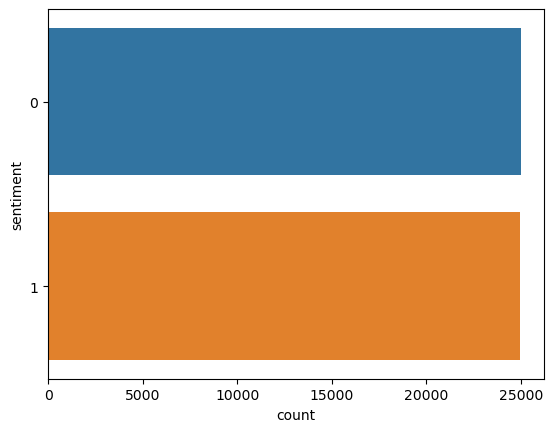

In [14]:
sns.countplot(y=df['sentiment'])

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
tokenizer=Tokenizer(num_words=5000)

In [17]:
tokenizer.fit_on_texts(X)

In [18]:
vocab_size=len(tokenizer.word_index)+1

In [19]:
def text_encoding(txt):
    encoded_docs=tokenizer.texts_to_sequences(txt)
    padded_sequence=pad_sequences(encoded_docs,maxlen=128)
    
    return padded_sequence

In [20]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [21]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 300))

model.add(layers.GRU(300,  return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.GRU(300))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(2, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         30350100  
                                                                 
 gru (GRU)                   (None, None, 300)         541800    
                                                                 
 dropout (Dropout)           (None, None, 300)         0         
                                                                 
 gru_1 (GRU)                 (None, 300)               541800    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense (Dense)               (None, 32)                9632      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [27]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
model.fit(X_train, y_train, epochs=5, validation_split = 0.2)

Epoch 1/5
1000/1000 [==============================] - 1657s 2s/step - loss: 0.4090 - accuracy: 0.8114 - val_loss: 0.3126 - val_accuracy: 0.8667
Epoch 2/5
1000/1000 [==============================] - 1694s 2s/step - loss: 0.2518 - accuracy: 0.9003 - val_loss: 0.2802 - val_accuracy: 0.8826
Epoch 3/5
1000/1000 [==============================] - 1240s 1s/step - loss: 0.1900 - accuracy: 0.9275 - val_loss: 0.3394 - val_accuracy: 0.8750
Epoch 4/5
1000/1000 [==============================] - 1040s 1s/step - loss: 0.1365 - accuracy: 0.9509 - val_loss: 0.3544 - val_accuracy: 0.8714
Epoch 5/5
1000/1000 [==============================] - 780s 780ms/step - loss: 0.0964 - accuracy: 0.9666 - val_loss: 0.4740 - val_accuracy: 0.8653


In [29]:
y_pred = model.predict(X_test)

313/313 [==============================] - 44s 138ms/step


In [31]:
y_pred=[np.argmax(i) for i in y_pred]

In [34]:
accuracy_score(y_test, y_pred)

0.8668200920552331

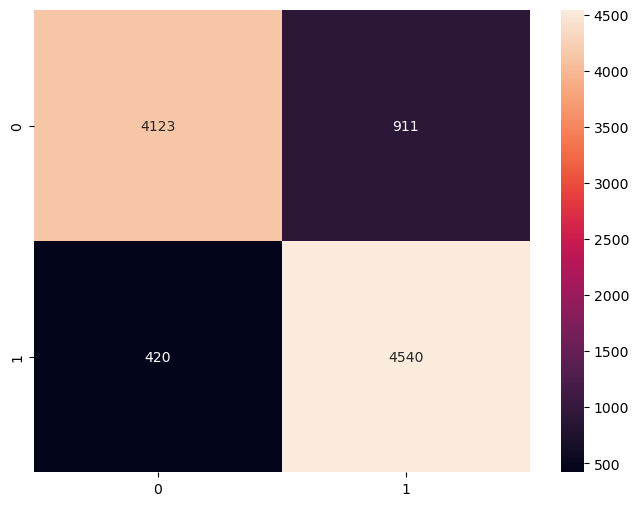

In [36]:
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5034
           1       0.83      0.92      0.87      4960

    accuracy                           0.87      9994
   macro avg       0.87      0.87      0.87      9994
weighted avg       0.87      0.87      0.87      9994

